1.5993485342019544


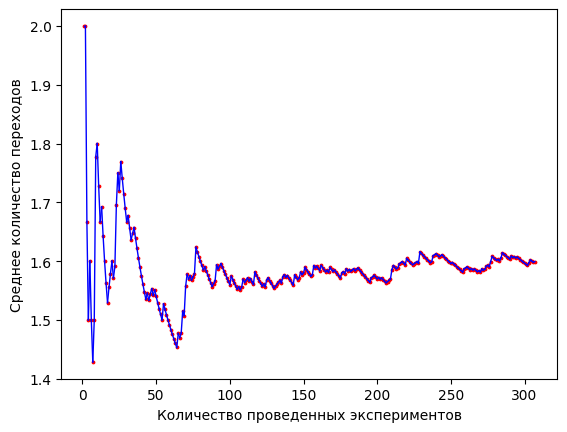

In [56]:
import random
import matplotlib.pyplot as plt

EPSILON = 0.001

model_transition_probabilities = [
    [0.1,   0.3,    0.6],
    [0,     0.3,    0.7],
    [0,     0,      1]
]
start_state = 0
finish_state = 2


experiments = []
accum_transition_avg_count = []

while (
    len(experiments) < 3 or
    max(accum_transition_avg_count[-3:]) -
        min(accum_transition_avg_count[-3:]) > 2 * EPSILON
):
    experiment = [start_state]
    while (experiment[-1] != finish_state):
        transition_prob = random.random()
        actual_state_probs = model_transition_probabilities[experiment[-1]]
        for i in range(len(model_transition_probabilities)):
            if (transition_prob < sum(actual_state_probs[:i + 1])):
                experiment.append(i)
                break

    experiments.append(experiment)
    accum_transition_avg_count.append(
        sum(map(lambda exp: len(exp) - 1, experiments)) / len(experiments))


for i in range(1, len(experiments)):
    plt.plot((i, i + 1), (accum_transition_avg_count[i - 1], accum_transition_avg_count[i]), linewidth=1, color='blue')

plt.scatter(range(1, len(experiments) + 1), accum_transition_avg_count, s=3, color='red')

plt.xlabel('Количество проведенных экспериментов')
plt.ylabel('Cреднее количество переходов')

print(accum_transition_avg_count[-1])
plt.show()